In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv('noshow_clean.csv')

In [2]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,success
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,Jardim Da Penha,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,Jardim Da Penha,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,Mata Da Praia,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,Pontal De Camburi,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,Jardim Da Penha,0,1,1,0,0,0,1


# To explore
1. Any relationship between gender and success
2. Relationship between other individual traits (scholarship, hipertension, diabetes, alcoholism, handcap, sms received)
3. Neighbourhood
4. Appointment day (day of week)
5. Repeat patients and if it is higher

## Correlations
We want to use pearsons r to find if there are any correlations between success and specific variables

In [3]:
df['scholarship'].corr(df['success'])

-0.029390574536307213

In [4]:
df['hipertension'].corr(df['success'])

0.036175874201493624

In [5]:
df['diabetes'].corr(df['success'])

0.015169351261922566

In [6]:
df['alcoholism'].corr(df['success'])

0.00024458951218007924

In [7]:
df['handcap'].corr(df['success'])

0.007762077995618917

In [8]:
df['sms_received'].corr(df['success'])

-0.1266782067897104

Everything is pretty weak in terms of correlations. The only one that might be good to explore is the number of sms received, though that looks like it might be a negative correlation

## Neighbourhood
Taking a look at different neighbourhoods to see if there may be a correlation

In [9]:
neighbourhood = df.groupby(['neighbourhood', 'success']).count()
b = neighbourhood['age']
b = b.unstack()

In [10]:
b['total'] = b[1] + b[0]

In [11]:
b.columns = ['no_show','show', 'total']

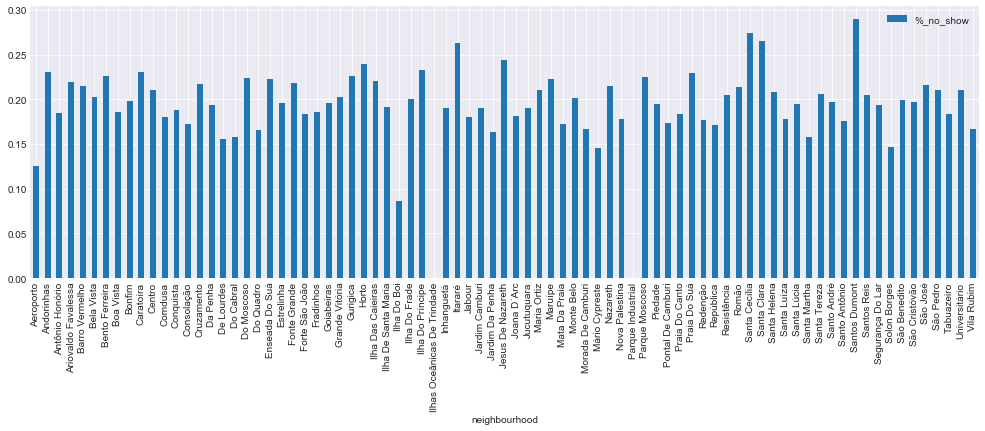

In [12]:
b['%_no_show'] = b['no_show'] / b['total']
b['%_show'] = b['show'] / b['total']
b.fillna(0)
b[['%_no_show']].plot.bar(figsize=(17,5))

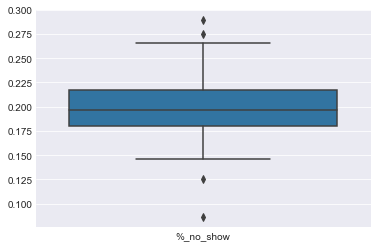

In [13]:
# look at box plot to see if there are any outliers
sns.boxplot(data=b[['%_no_show']])

In [14]:
b[['%_no_show']].describe()

,%_no_show
count,79.000000
mean,0.198028
std,0.031718
min,0.085714
25%,0.180199
50%,0.196721
75%,0.216684
max,0.289639


In [17]:
# Try to get the outliers
# IQR is q3 - q1
iqr = 0.216684 - 0.180199 

# Determine outliers
b[b['%_no_show'] > 0.216684 + (1.5 * iqr)]

,no_show,show,total,%_no_show,%_show
neighbourhood,,,,,
Santa Cecília,123.0,325.0,448.0,0.274554,0.725446
Santos Dumont,369.0,905.0,1274.0,0.289639,0.710361


In [18]:
b[b['%_no_show'] < 0.180199 - (1.5 * iqr)]

,no_show,show,total,%_no_show,%_show
neighbourhood,,,,,
Aeroporto,1.0,7.0,8.0,0.125000,0.875000
Ilha Do Boi,3.0,32.0,35.0,0.085714,0.914286


We observe from this that in the outliers the neighbourhoods of Santa Cecília and Santos Dumont have a very high % of no shows whilst the neighbourhoods of Aeroporto and Illha Do Boi have a very low % of no shows

## Age

In [19]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  86,
        91,  98,  92,  94,  96,  93,  95,  97, 102, 115, 100,  99])

In [28]:
age = df[['age', 'success']].copy()

In [29]:
# Group everything into age
def group_age (row):
    if row['age'] <= 20 :
        return '0-20'
    elif row['age'] <= 30:
        return '21-30'
    elif row['age'] <= 40:
        return '31-40'
    elif row['age'] <= 50:
        return '41-50'
    elif row['age'] <= 60:
        return '51-60'
    elif row['age'] <= 70:
        return '61-70'
    elif row['age'] <= 80:
        return '71-80'
    elif row['age'] <= 90:
        return '81-90'
    else:
        return '>90'

In [30]:
age['groupped_age'] = age.apply(lambda row: group_age (row), axis = 1)

In [31]:
groupped_age = age.groupby('groupped_age').count()
groupped_age.drop('age', inplace = True, axis = 1)
groupped_age.columns = ['total']
groupped_age.head()

,total
groupped_age,
0-20,31797
21-30,13771
31-40,15027
41-50,14402
51-60,15639


[Text(0,0,'0-20'),
 Text(0,0,'21-30'),
 Text(0,0,'31-40'),
 Text(0,0,'41-50'),
 Text(0,0,'51-60'),
 Text(0,0,'61-70'),
 Text(0,0,'71-80'),
 Text(0,0,'81-90'),
 Text(0,0,'>90')]

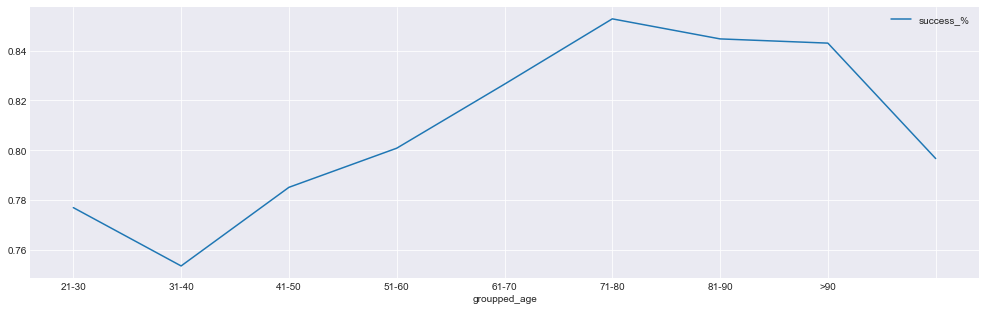

In [33]:
age_success = age.groupby('groupped_age').sum()
groupped_age['success'] = age_success['success']
groupped_age['success_%'] = groupped_age['success'] / groupped_age['total']
import matplotlib.pyplot as plt

ax = groupped_age[['success_%']].plot(figsize=(17,5))
ax.set_xticklabels(groupped_age.index)

#TODO fix up labels